In [1]:
%%capture
''' This is just for downloading the dataset '''
! wget https://data.mendeley.com/public-files/datasets/z7dj3yyzt8/files/8302e52d-22ae-411d-8be3-4b0af3a76b12/file_downloaded
! wget https://data.mendeley.com/public-files/datasets/z7dj3yyzt8/files/d2a812cb-e6e4-4701-a84a-8c5621023a12/file_downloaded
! wget https://data.mendeley.com/public-files/datasets/z7dj3yyzt8/files/67e5bd6e-1d2e-4a7d-bef0-248fda7c91a0/file_downloaded

In [2]:
# Importing Required Packages & Libraries

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, StratifiedKFold, StratifiedShuffleSplit

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import mean_absolute_error, accuracy_score, classification_report
# Setting the numpy random seed
np.random.seed(37)

# Magic Commands
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cp /content/drive/MyDrive/GPS_Spoofing/data3.csv .

cp: cannot stat '/content/drive/MyDrive/GPS_Spoofing/data3.csv': No such file or directory


In [5]:
%cp /content/file_downloaded.2 ./data3.xlsx

In [6]:
''' converting from excel to csv for faster diving into dataset'''
import pandas as pd
# df1 = pd.read_excel('./data1.xlsx')
# df1.to_csv(r"./data1.csv", index=False, header=True)

# df2 = pd.read_excel('./data2.xlsx')
# df2.to_csv(r"./data2.csv", index=False, header=True)

df3 = pd.read_excel('./data3.xlsx')
df3.to_csv(r"./data3.csv", index=False, header=True)

In [7]:
%cp /content/data3.csv /content/drive/MyDrive/GPS_Spoofing

In [8]:
%cp /content/drive/MyDrive/GPS_Spoofing/Dataset/data3.csv .

cp: cannot stat '/content/drive/MyDrive/GPS_Spoofing/Dataset/data3.csv': Not a directory


In [9]:
import pandas as pd
df = pd.read_csv('./data3.csv')

'''
This is the dataset which is proper for
supervised learning based on our proposal.
'''

for col in df.columns:
  print(col, end = '    ')

PRN    DO    PD    RX    TOW    CP    EC    LC    PC    PIP    PQP    TCD    CN0    Output    

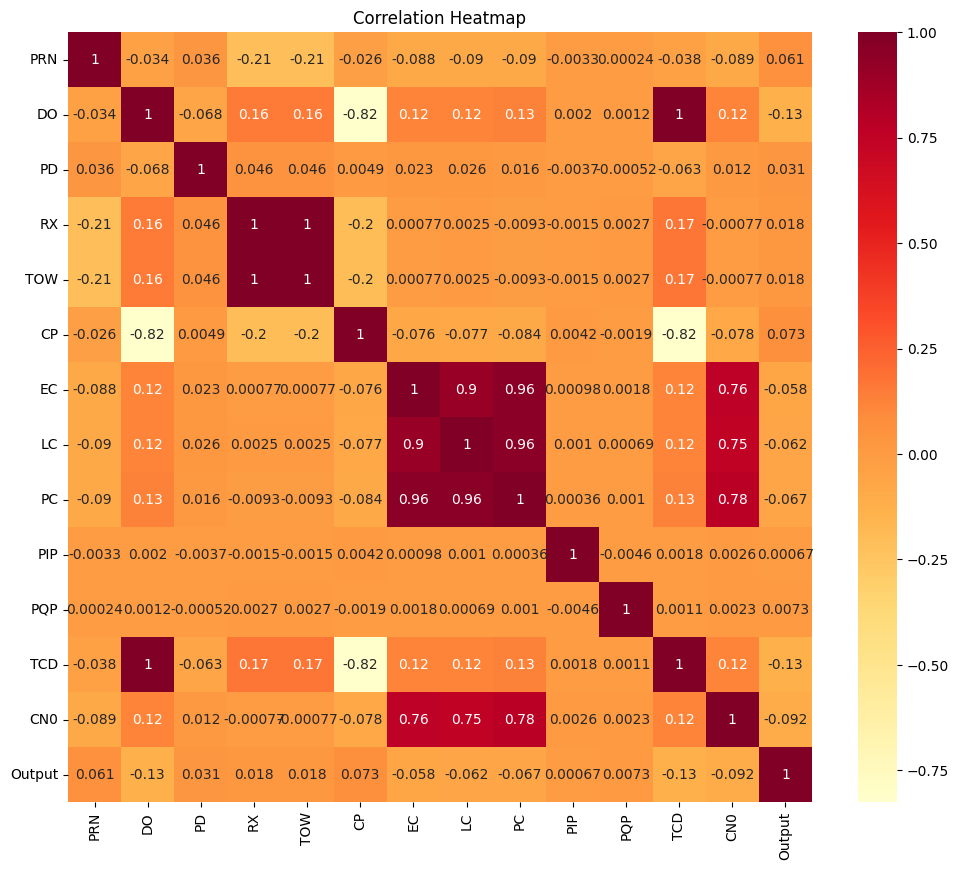

In [10]:
# Create a correlation matrix
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='YlOrRd')
plt.title('Correlation Heatmap')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [ ]:
df.head()

### **`Description of the dataset`**

The dataset described in "A DATASET for GPS Spoofing Detection on Unmanned Aerial Systems" contains the following 13 features extracted from eight parallel channels during GPS signal processing:

`1. PRN (Pseudo-Random Noise): `

This feature identifies the satellite from which the GPS signal is received. It is used to distinguish between signals from different satellites.

`2. DO (Doppler Offset): `

The Doppler Offset measures the frequency shift in the received GPS signal due to the relative motion between the satellite and the receiver. It is measured in Hz.

`3. PD (Pseudorange):`

The Pseudorange estimates the distance between the GPS satellite and the receiver, based on the signal travel time. It is measured in meters.

`4. RX (Receiver Time):`

This feature represents the time recorded by the receiver.

`5. TOW (Time of Week):`

The Time of Week indicates the number of seconds since the start of the current GPS week.

`6. CP (Carrier Phase):`

The Carrier Phase captures the accumulated phase difference between the received carrier signal and the locally generated carrier signal. It is measured in cycles.

`7. EC (Early Correlation):`

The Early Correlation is the correlation value between the received signal and an early replica of the locally generated code. It is used for code tracking.

`8. LC (Late Correlation):`

The Late Correlation is the correlation value between the received signal and a late replica of the locally generated code. It is also used for code tracking.

`9. PC (Prompt Correlation):`

The Prompt Correlation is the correlation value between the received signal and a prompt replica of the locally generated code. It is used for data demodulation.

`10. PIP (Prompt I-Prompt):`

The Prompt I-Prompt is the in-phase component of the prompt correlation value.

`11. PQP (Prompt Q-Prompt):`

The Prompt Q-Prompt is the quadrature-phase component of the prompt correlation value.

`12. TCD (Time of Code Delay):`

The Time of Code Delay is the time difference between the received code and the locally generated code. It is measured in seconds.

`3. CN0 (Carrier-to-Noise Density Ratio):`

The Carrier-to-Noise Density Ratio is a measure of the signal strength relative to the noise level. It is measured in dB-Hz.

These features were extracted from authentic GPS signals collected using an eight-channel GPS receiver installed on a vehicle moving at speeds from 0 to 60 mph to emulate UAS flight, as well as from three static positions on top of different buildings to emulate UAS hovering. In addition to the authentic signals, three types of GPS spoofing attacks (simplistic, intermediate, and sophisticated) were simulated.

In [11]:
df.describe()

,PRN,DO,PD,RX,TOW,CP,EC,LC,PC,PIP,PQP,TCD,CN0,Output
count,510530.000000,510530.000000,5.105300e+05,510530.000000,510530.000000,5.105300e+05,510530.000000,510530.000000,510530.000000,510530.000000,510530.000000,510530.000000,510530.000000,510530.000000
mean,14.399743,1293.270723,7.992497e+06,282666.233354,282666.208111,-1.216893e+05,107973.452869,107946.509101,119563.129474,39.357453,65.535775,1303.725859,44.717167,0.432819
std,9.279444,2362.534207,1.006911e+07,106925.234281,106925.232122,2.398627e+05,31711.904090,31572.262598,34068.953790,122138.198997,24318.316229,2348.382188,2.909404,0.891641
min,2.000000,-4262.754835,-6.588428e+06,173640.000000,173640.008000,-1.032332e+06,-11261.148740,-12557.513790,318.674133,-270777.625000,-216012.859900,-3214.671400,0.000000,0.000000
25%,7.000000,-868.884393,2.374256e+06,174220.600000,174220.522000,-2.560281e+05,86407.752045,86486.361330,96580.286923,-119618.003925,-11904.076640,-864.922714,43.203264,0.000000
50%,11.000000,1425.205130,3.777471e+06,263290.160000,263290.145050,-9.741575e+04,109815.675800,109799.156250,121863.750000,-339.778535,35.455368,1472.187866,45.346006,0.000000
75%,26.000000,3451.204770,6.814777e+06,263799.780000,263799.770600,6.364966e+04,130963.429675,130794.406300,144362.848125,119631.968800,11955.028080,3444.271612,46.691953,0.000000
max,31.000000,6715.759846,2.830762e+07,492039.420000,492039.341092,3.527992e+05,244872.734400,244650.390600,271466.125000,242361.078100,226761.110000,5260.343750,50.482834,3.000000


In [12]:
# Count unique values in the 'Output' column
num_unique = len(df['Output'].unique())
print(f"Number of unique values in 'Output': {num_unique}")

Number of unique values in 'Output': 4


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510530 entries, 0 to 510529
Data columns (total 14 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   PRN     510530 non-null  int64  
 1   DO      510530 non-null  float64
 2   PD      510530 non-null  float64
 3   RX      510530 non-null  float64
 4   TOW     510530 non-null  float64
 5   CP      510530 non-null  float64
 6   EC      510530 non-null  float64
 7   LC      510530 non-null  float64
 8   PC      510530 non-null  float64
 9   PIP     510530 non-null  float64
 10  PQP     510530 non-null  float64
 11  TCD     510530 non-null  float64
 12  CN0     510530 non-null  float64
 13  Output  510530 non-null  int64  
dtypes: float64(12), int64(2)
memory usage: 54.5 MB


In [14]:
print(df.shape)

(510530, 14)


In [15]:
df.isnull().sum()

,0
PRN,0
DO,0
PD,0
RX,0
TOW,0
CP,0
EC,0
LC,0
PC,0
PIP,0


Original class distribution: Counter({0: 397825, 2: 44232, 1: 36458, 3: 32015})


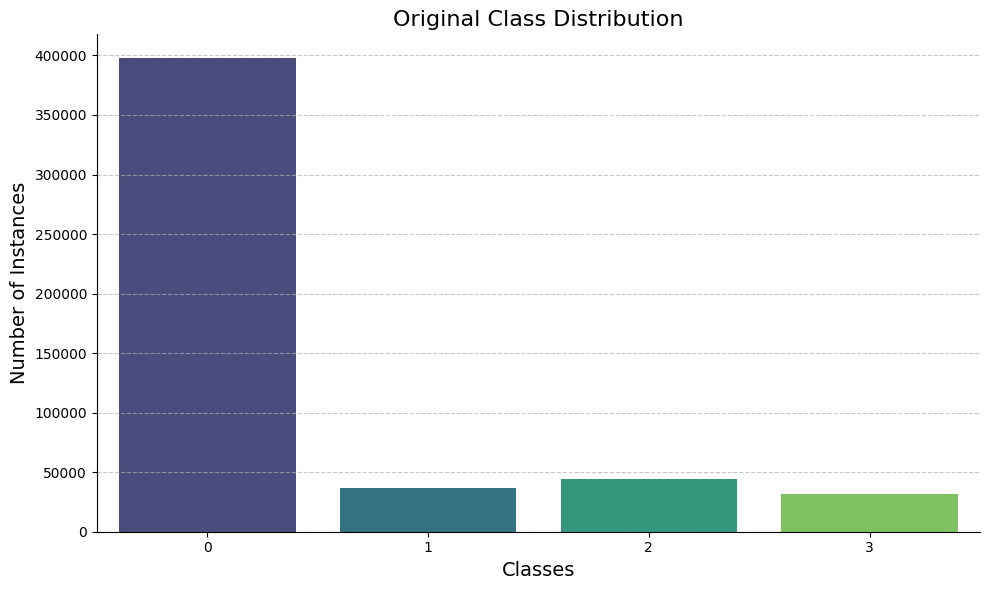


Random Oversampling class distribution: Counter({0: 397825, 1: 397825, 2: 397825, 3: 397825})

Random Undersampling class distribution: Counter({0: 32015, 1: 32015, 2: 32015, 3: 32015})

SMOTE class distribution: Counter({0: 397825, 1: 397825, 2: 397825, 3: 397825})


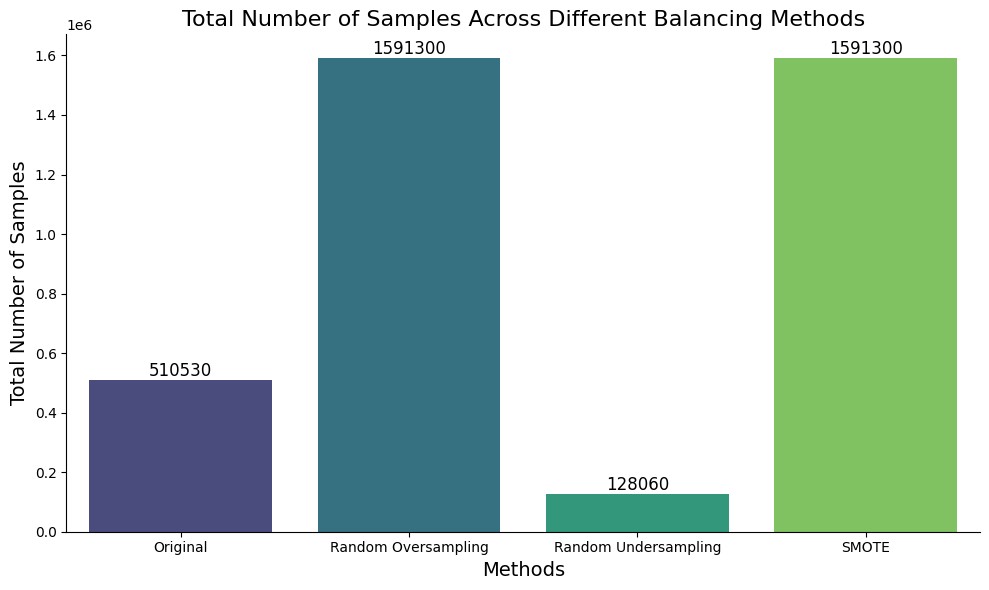

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE

# Function to apply balancing technique and print results
def apply_balancing(X, y, technique, technique_name):
    X_resampled, y_resampled = technique.fit_resample(X, y)
    print(f"\n{technique_name} class distribution:", Counter(y_resampled))
    return X_resampled, y_resampled

# Function to plot class distribution with enhanced aesthetics and save as high-res image
def plot_class_distribution(y):
    class_counts = Counter(y)
    classes = list(class_counts.keys())
    counts = list(class_counts.values())

    # Create a DataFrame for seaborn
    data = {'Class': classes, 'Count': counts}

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Class', y='Count', data=data, palette='viridis')

    plt.xlabel('Classes', fontsize=14)
    plt.ylabel('Number of Instances', fontsize=14)
    plt.title('Original Class Distribution', fontsize=16)
    plt.xticks(classes)  # Set x-ticks to class labels
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Adjusting the aesthetics for publication quality
    sns.despine()  # Remove top and right spines for a cleaner look
    plt.tight_layout()  # Adjust layout to fit labels better

    # Save the figure as a high-resolution image
    plt.savefig("class_distribution.png", dpi=300, bbox_inches='tight')  # Save at 300 DPI
    plt.show()

# Function to plot total samples across different methods and save as high-res image
def plot_total_samples(original_count, ros_count, rus_count, smote_count):
    methods = ['Original', 'Random Oversampling', 'Random Undersampling', 'SMOTE']
    counts = [original_count, ros_count, rus_count, smote_count]

    plt.figure(figsize=(10, 6))
    sns.barplot(x=methods, y=counts, palette='viridis')

    plt.xlabel('Methods', fontsize=14)
    plt.ylabel('Total Number of Samples', fontsize=14)
    plt.title('Total Number of Samples Across Different Balancing Methods', fontsize=16)

    # Adding count labels on top of bars
    for i in range(len(counts)):
        plt.text(i, counts[i], counts[i], ha='center', va='bottom', fontsize=12)

    sns.despine()  # Remove top and right spines for a cleaner look
    plt.tight_layout()  # Adjust layout to fit labels better

    # Save the figure as a high-resolution image
    plt.savefig("total_samples_comparison.png", dpi=300, bbox_inches='tight')  # Save at 300 DPI
    plt.show()

# Assuming df is your DataFrame containing the dataset
X = df.drop(columns=['Output'])
y = df.Output
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=42)

# Print original class distribution and plot it
print("Original class distribution:", Counter(y))
plot_class_distribution(y)  # Call the function to plot and save the distribution

# Count original samples
original_count = len(y)

# 1. Random Oversampling
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = apply_balancing(X, y, ros, "Random Oversampling")
ros_count = len(y_ros)

# 2. Random Undersampling
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = apply_balancing(X, y, rus, "Random Undersampling")
rus_count = len(y_rus)

# 3. SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = apply_balancing(X, y, smote, "SMOTE")
smote_count = len(y_smote)

# Plot total samples across different methods and save it as a high-res image
plot_total_samples(original_count, ros_count, rus_count, smote_count)

In [17]:
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE


# Function to apply balancing technique and print results
def apply_balancing(X, y, technique, technique_name):
    X_resampled, y_resampled = technique.fit_resample(X, y)
    print(f"\n{technique_name} class distribution:", Counter(y_resampled))
    return X_resampled, y_resampled

X = df.drop(columns=['Output'])
y = df.Output
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=42)

In [18]:
# Print original class distribution
print("Original class distribution:", Counter(y))

# 1. Random Oversampling
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = apply_balancing(X, y, ros, "Random Oversampling")

# 2. Random Undersampling
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = apply_balancing(X, y, rus, "Random Undersampling")

# 3. SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = apply_balancing(X, y, smote, "SMOTE")

Original class distribution: Counter({0: 397825, 2: 44232, 1: 36458, 3: 32015})

Random Oversampling class distribution: Counter({0: 397825, 1: 397825, 2: 397825, 3: 397825})

Random Undersampling class distribution: Counter({0: 32015, 1: 32015, 2: 32015, 3: 32015})

SMOTE class distribution: Counter({0: 397825, 1: 397825, 2: 397825, 3: 397825})


In [19]:
scaler = StandardScaler()
X_rus_scaled = scaler.fit_transform(X_rus)
# Train test split
X_rus_train, X_rus_test, y_rus_train, y_rus_test = train_test_split(X_rus_scaled,
                                                    y_rus,
                                                    test_size=0.3,
                                                    random_state=42)

In [20]:
# Print the shapes of each split
print("Shapes of the splits:")
print(f"X_rus_train shape: {X_rus_train.shape}")
print(f"y_rus_train shape: {y_rus_train.shape}")
print(f"X_rus_test shape: {X_rus_test.shape}")
print(f"y_rus_test shape: {y_rus_test.shape}")

# Print the total number of samples
total_samples = len(X_rus_scaled)
print(f"\nTotal number of samples: {total_samples}")

# Print the number of samples in each split
print(f"Number of training samples: {len(X_rus_train)}")
print(f"Number of testing samples: {len(X_rus_test)}")

# If you want to see the distribution of classes in y_rus_train and y_rus_test
from collections import Counter

print("\nClass distribution in training set:")
print(Counter(y_rus_train))

print("\nClass distribution in testing set:")
print(Counter(y_rus_test))

# Calculate and print percentages
train_percentage = (len(X_rus_train) / total_samples) * 100
test_percentage = (len(X_rus_test) / total_samples) * 100

print(f"\nPercentage of data in training set: {train_percentage:.2f}%")
print(f"Percentage of data in testing set: {test_percentage:.2f}%")

Shapes of the splits:
X_rus_train shape: (89642, 13)
y_rus_train shape: (89642,)
X_rus_test shape: (38418, 13)
y_rus_test shape: (38418,)

Total number of samples: 128060
Number of training samples: 89642
Number of testing samples: 38418

Class distribution in training set:
Counter({3: 22489, 2: 22471, 0: 22427, 1: 22255})

Class distribution in testing set:
Counter({1: 9760, 0: 9588, 2: 9544, 3: 9526})

Percentage of data in training set: 70.00%
Percentage of data in testing set: 30.00%


In [21]:
# K-fold splits
cv = StratifiedShuffleSplit(n_splits=5, test_size=.30, random_state=42)

In [22]:
# Defining all the parameters
params = {
    'penalty': ['l2'],
    # 'C': [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10]
    'C': [0.1 ,1 ,10]
    }

# Building model
logreg = LogisticRegression(solver='liblinear')

# Parameter estimating using GridSearch
grid = GridSearchCV(logreg,
                    param_grid=params,
                    scoring='accuracy',
                    n_jobs =-1,
                    cv=cv,
                    verbose=1)

# Fitting the model
grid.fit(X_rus_train, y_rus_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=0.3,
            train_size=None),
             estimator=LogisticRegression(solver='liblinear'), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'penalty': ['l2']},
             scoring='accuracy', verbose=1)

In [23]:
print('Best Score:', grid.best_score_)
print('Best Params:', grid.best_params_)
print('Best Estimator:', grid.best_estimator_)

Best Score: 0.4403673818465772
Best Params: {'C': 1, 'penalty': 'l2'}
Best Estimator: LogisticRegression(C=1, solver='liblinear')


In [24]:
logreg_grid = grid.best_estimator_
y_pred = logreg_grid.predict(X_rus_test)

In [25]:
# Calculating metrics

logreg_grid_score = accuracy_score(y_rus_test, y_pred)
print('Model Accuracy:', logreg_grid_score)
print('Classification Report:\n', classification_report(y_rus_test, y_pred))

Model Accuracy: 0.44278723515019003
Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.38      0.41      9588
           1       0.46      0.42      0.44      9760
           2       0.42      0.36      0.39      9544
           3       0.44      0.62      0.51      9526

    accuracy                           0.44     38418
   macro avg       0.44      0.44      0.44     38418
weighted avg       0.44      0.44      0.44     38418



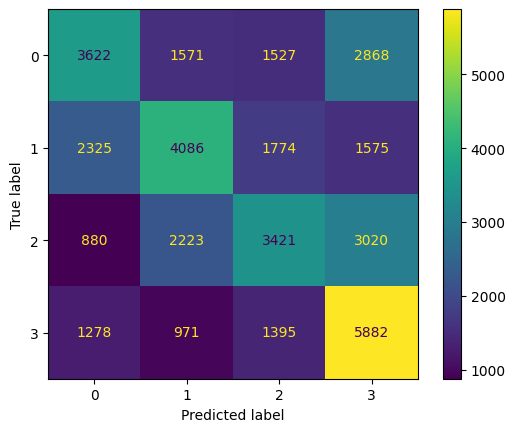

In [26]:
# Confusion matrix of test set
cm = confusion_matrix(y_rus_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=logreg_grid.classes_)
disp.plot()
plt.show()

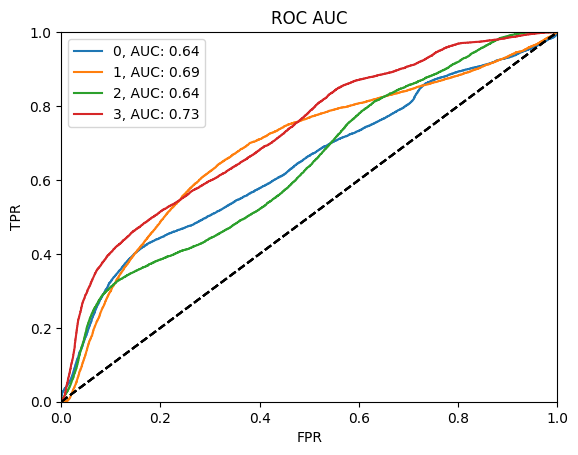

In [27]:
# Generate class membership probabilities
from sklearn.metrics import roc_curve, auc
y_pred_probs = logreg_grid.predict_proba(X_rus_test)

classes = [0,1, 2, 3]

# For each class
for i, clas in enumerate(classes):
  # Calculate False Positive Rate, True Negative Rate
  fpr, tpr, thresholds = roc_curve(y_rus_test, y_pred_probs[:,i],
                                   pos_label = clas)

  # Calculate AUC
  auroc = auc(fpr, tpr)

  # Plot ROC AUC curve for each class
  plt.plot(fpr, tpr, label=f'{clas}, AUC: {auroc:.2f}')
  plt.plot([0, 1], [0, 1], 'k--')

plt.title('ROC AUC')
plt.xlabel('FPR'); plt.ylabel('TPR')
plt.xlim(0,1); plt.ylim(0,1)
plt.legend()
plt.show()

## **`2. K-Nearest Neighbor (KNN)`**

In [28]:
# Defining all the parameters
params = {
    'n_neighbors': [3,5,7,9],
    'weights': ['uniform','distance']}

# Building model
knn = KNeighborsClassifier()
# Parameter estimating using GridSearch
grid = GridSearchCV(knn,
                    param_grid=params,
                    scoring='accuracy',
                    n_jobs =-1,
                    cv=cv,
                    verbose=1)

# Fitting the model
grid.fit(X_rus_train, y_rus_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=0.3,
            train_size=None),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [29]:
print('Best Score:', grid.best_score_)
print('Best Params:', grid.best_params_)
print('Best Estimator:', grid.best_estimator_)

Best Score: 0.8199828951771837
Best Params: {'n_neighbors': 7, 'weights': 'uniform'}
Best Estimator: KNeighborsClassifier(n_neighbors=7)


In [30]:
'''
Using the best parameters from the grid-search
and predicting on test feature dataset(X_test)
'''

knn_grid= grid.best_estimator_
y_pred = knn_grid.predict(X_rus_test)

In [31]:
# Calculating metrics

knn_grid_score = accuracy_score(y_rus_test, y_pred)
print('Model Accuracy:', knn_grid_score)
print('Classification Report:\n', classification_report(y_rus_test, y_pred))

Model Accuracy: 0.8231558123796138
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.66      0.77      9588
           1       0.79      0.86      0.83      9760
           2       0.77      0.84      0.80      9544
           3       0.85      0.93      0.88      9526

    accuracy                           0.82     38418
   macro avg       0.83      0.82      0.82     38418
weighted avg       0.83      0.82      0.82     38418



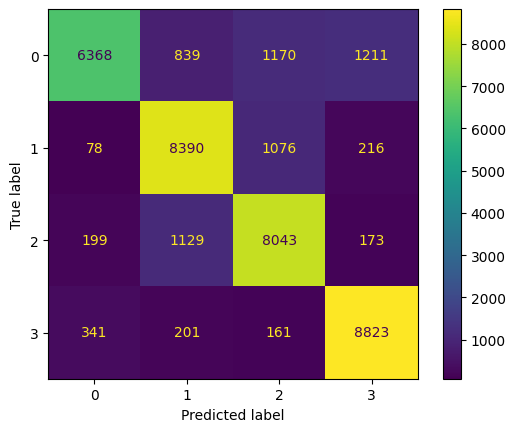

In [32]:
# Confusion matrix of test set
cm = confusion_matrix(y_rus_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=knn_grid.classes_)
disp.plot()
plt.show()

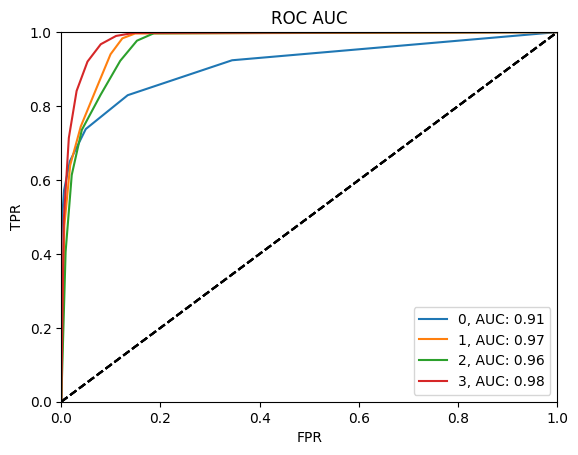

In [33]:
# Generate class membership probabilities
y_pred_probs = knn_grid.predict_proba(X_rus_test)

classes = [0,1, 2, 3]

# For each class
for i, clas in enumerate(classes):
  # Calculate False Positive Rate, True Negative Rate
  fpr, tpr, thresholds = roc_curve(y_rus_test, y_pred_probs[:,i],
                                   pos_label = clas)

  # Calculate AUC
  auroc = auc(fpr, tpr)

  # Plot ROC AUC curve for each class
  plt.plot(fpr, tpr, label=f'{clas}, AUC: {auroc:.2f}')
  plt.plot([0, 1], [0, 1], 'k--')

plt.title('ROC AUC')
plt.xlabel('FPR'); plt.ylabel('TPR')
plt.xlim(0,1); plt.ylim(0,1)
plt.legend()
plt.show()

## **`3. Gaussian Naive Bayes (gaussianNB)`**

In [34]:
params = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}

# Building model
gb = GaussianNB()
# Parameter estimating using GridSearch
grid = GridSearchCV(gb,
                    param_grid=params,
                    scoring='accuracy',
                    n_jobs =-1,
                    cv=cv,
                    verbose=1)
# Fitting the model
grid.fit(X_rus_train, y_rus_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=0.3,
            train_size=None),
             estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]},
             scoring='accuracy', verbose=1)

In [35]:
print('Best Score:', grid.best_score_)
print('Best Estimator:', grid.best_estimator_)

Best Score: 0.42784367679321755
Best Estimator: GaussianNB()


In [36]:
gb_grid= grid.best_estimator_
y_pred = gb_grid.predict(X_rus_test)

In [37]:
# Calculating metrics

gb_grid_score = accuracy_score(y_rus_test, y_pred)
print('Model Accuracy:', gb_grid_score)
print('Classification Report:\n', classification_report(y_rus_test, y_pred))

Model Accuracy: 0.4247227861939716
Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.45      0.44      9588
           1       0.46      0.39      0.42      9760
           2       0.44      0.23      0.31      9544
           3       0.40      0.63      0.49      9526

    accuracy                           0.42     38418
   macro avg       0.43      0.42      0.41     38418
weighted avg       0.43      0.42      0.41     38418



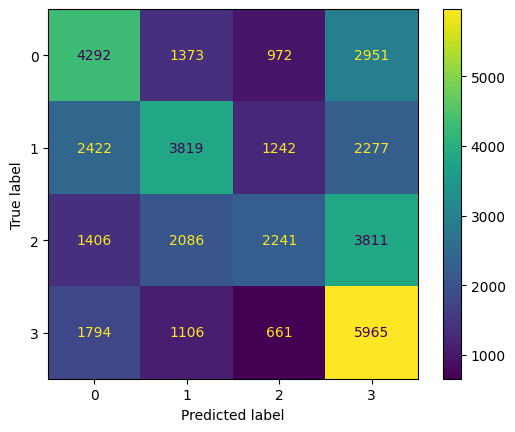

In [38]:
# Confusion matrix of test set
cm = confusion_matrix(y_rus_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels= gb_grid.classes_)
disp.plot()
plt.show()

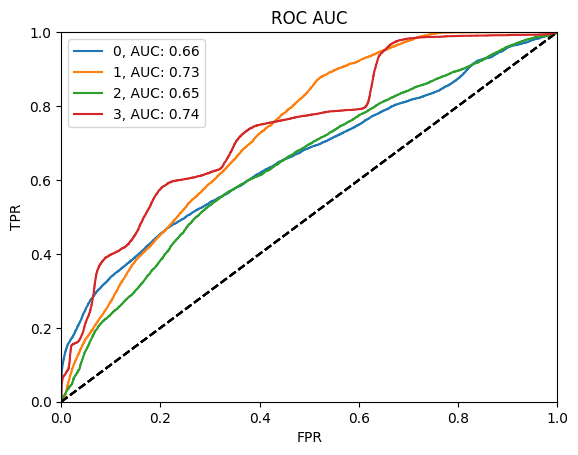

In [39]:
# Generate class membership probabilities
y_pred_probs = gb_grid.predict_proba(X_rus_test)

classes = [0,1, 2, 3]

# For each class
for i, clas in enumerate(classes):
  # Calculate False Positive Rate, True Negative Rate
  fpr, tpr, thresholds = roc_curve(y_rus_test, y_pred_probs[:,i],
                                   pos_label = clas)

  # Calculate AUC
  auroc = auc(fpr, tpr)

  # Plot ROC AUC curve for each class
  plt.plot(fpr, tpr, label=f'{clas}, AUC: {auroc:.2f}')
  plt.plot([0, 1], [0, 1], 'k--')

plt.title('ROC AUC')
plt.xlabel('FPR'); plt.ylabel('TPR')
plt.xlim(0,1); plt.ylim(0,1)
plt.legend()
plt.show()

## **`4. Support Vector Machines Classifier(SVC)`**

In [40]:
# Defining all the parameters
params = {
    'C': [1],
    'gamma' : [0.1]
}

# Building model
svc = SVC(kernel='rbf', probability=True) ## 'rbf' stands for gaussian kernel

# Parameter estimating using GridSearch
grid = GridSearchCV(svc,
                    param_grid=params,
                    scoring='accuracy',
                    n_jobs =-1,
                    cv=cv,
                    verbose=1)

# Fitting the model
grid.fit(X_rus_train, y_rus_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=0.3,
            train_size=None),
             estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [1], 'gamma': [0.1]}, scoring='accuracy',
             verbose=1)

In [41]:
print('Best Score:', grid.best_score_)
print('Best Params:', grid.best_params_)
print('Best Estimator:', grid.best_estimator_)

Best Score: 0.8385899676495742
Best Params: {'C': 1, 'gamma': 0.1}
Best Estimator: SVC(C=1, gamma=0.1, probability=True)


In [42]:
svm_grid= grid.best_estimator_
y_pred = svm_grid.predict(X_rus_test)

In [43]:
# Calculating metrics
svm_grid_score = accuracy_score(y_rus_test, y_pred)
print('Model Accuracy:', svm_grid_score)
print('Classification Report:\n', classification_report(y_rus_test, y_pred))

Model Accuracy: 0.8475454214170441
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.66      0.77      9588
           1       0.79      0.94      0.86      9760
           2       0.85      0.81      0.83      9544
           3       0.85      0.98      0.91      9526

    accuracy                           0.85     38418
   macro avg       0.86      0.85      0.84     38418
weighted avg       0.86      0.85      0.84     38418



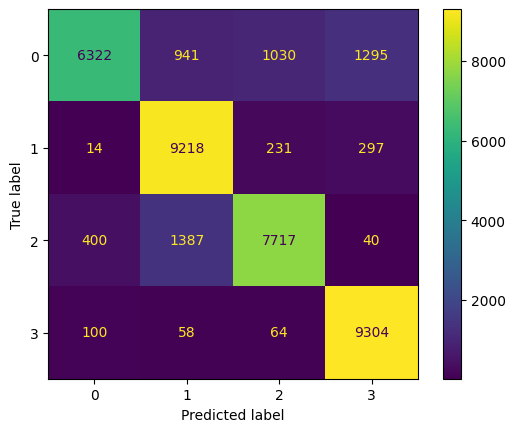

In [44]:
# Confusion matrix of test set
cm = confusion_matrix(y_rus_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels= svm_grid.classes_)
disp.plot()
plt.show()

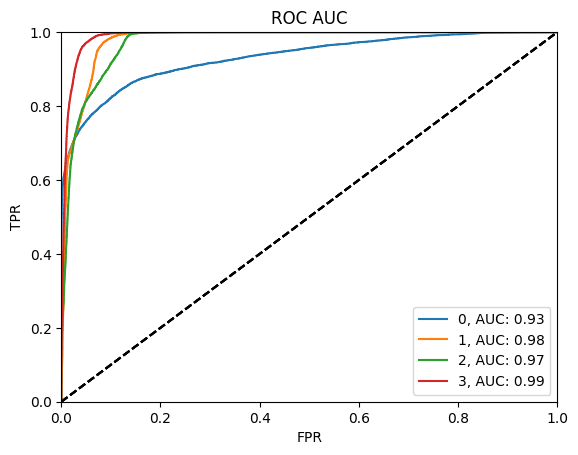

In [45]:
# Generate class membership probabilities
y_pred_probs = svm_grid.predict_proba(X_rus_test)

classes = [0,1, 2, 3]

# For each class
for i, clas in enumerate(classes):
  # Calculate False Positive Rate, True Negative Rate
  fpr, tpr, thresholds = roc_curve(y_rus_test, y_pred_probs[:,i],
                                   pos_label = clas)

  # Calculate AUC
  auroc = auc(fpr, tpr)

  # Plot ROC AUC curve for each class
  plt.plot(fpr, tpr, label=f'{clas}, AUC: {auroc:.2f}')
  plt.plot([0, 1], [0, 1], 'k--')

plt.title('ROC AUC')
plt.xlabel('FPR'); plt.ylabel('TPR')
plt.xlim(0,1); plt.ylim(0,1)
plt.legend()
plt.show()

## **`5. Decision Tree Classifier`**

In [46]:
# Defining all the parameters
params = {
    'max_features': [1, 3, 10],
    'min_samples_split': [2, 3, 10],
    'min_samples_leaf': [1, 3, 10],
    'criterion': ["entropy", "gini"]
}

# Building model
dtc = DecisionTreeClassifier()

# Parameter estimating using GridSearch
grid = GridSearchCV(dtc,
                    param_grid=params,
                    scoring='accuracy',
                    n_jobs =-1,
                    cv=cv,
                    verbose=1)

# Fitting the model
grid.fit(X_rus_train, y_rus_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=0.3,
            train_size=None),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_features': [1, 3, 10],
                         'min_samples_leaf': [1, 3, 10],
                         'min_samples_split': [2, 3, 10]},
             scoring='accuracy', verbose=1)

In [47]:
print('Best Score:', grid.best_score_)
print('Best Params:', grid.best_params_)
print('Best Estimator:', grid.best_estimator_)

Best Score: 0.9403487896478637
Best Params: {'criterion': 'gini', 'max_features': 10, 'min_samples_leaf': 10, 'min_samples_split': 2}
Best Estimator: DecisionTreeClassifier(max_features=10, min_samples_leaf=10)


In [48]:
dtc_grid= grid.best_estimator_
y_pred = dtc_grid.predict(X_rus_test)

In [49]:
# Calculating metrics

dtc_grid_score = accuracy_score(y_rus_test, y_pred)
print('Model Accuracy:', dtc_grid_score)
print('Classification Report:\n', classification_report(y_rus_test, y_pred))

Model Accuracy: 0.9427091467541256
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.96      9588
           1       0.91      0.92      0.92      9760
           2       0.89      0.92      0.90      9544
           3       0.99      1.00      0.99      9526

    accuracy                           0.94     38418
   macro avg       0.94      0.94      0.94     38418
weighted avg       0.94      0.94      0.94     38418



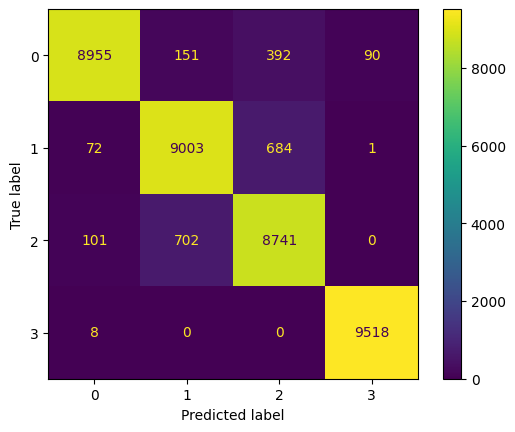

In [50]:
# Confusion matrix of test set
cm = confusion_matrix(y_rus_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels= dtc_grid.classes_)
disp.plot()
plt.show()

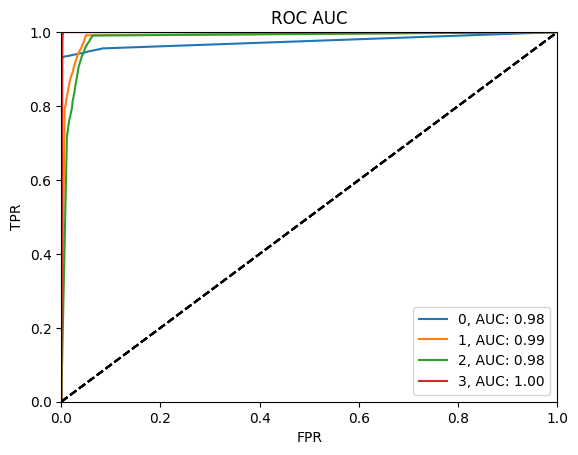

In [51]:
# Generate class membership probabilities
y_pred_probs = dtc_grid.predict_proba(X_rus_test)

# For each class
for i, clas in enumerate(classes):
  # Calculate False Positive Rate, True Negative Rate
  fpr, tpr, thresholds = roc_curve(y_rus_test, y_pred_probs[:,i],
                                   pos_label = clas)

  # Calculate AUC
  auroc = auc(fpr, tpr)

  # Plot ROC AUC curve for each class
  plt.plot(fpr, tpr, label=f'{clas}, AUC: {auroc:.2f}')
  plt.plot([0, 1], [0, 1], 'k--')

plt.title('ROC AUC')
plt.xlabel('FPR'); plt.ylabel('TPR')
plt.xlim(0,1); plt.ylim(0,1)
plt.legend()
plt.show()

## **`6. Random Forest Classifier`**

In [1]:
# Defining all the parameters
params = {
    'max_features': [3, 10],
    # 'min_samples_split': [2, 3, 10],
    'min_samples_leaf': [3, 10],
    # 'bootstrap': [False],
    'n_estimators' :[100,300],
    # 'criterion': ["entropy", "gini"]
}
classes = [0,1, 2, 3]
# Building model
rfc = RandomForestClassifier()

# Parameter estimating using GridSearch
grid = GridSearchCV(rfc,
                    param_grid=params,
                    scoring='accuracy',
                    n_jobs =-1,
                    cv=cv,
                    verbose=1)

# Fitting the model
grid.fit(X_rus_train, y_rus_train)

NameError: name 'RandomForestClassifier' is not defined

In [ ]:
print('Best Score:', grid.best_score_)
print('Best Params:', grid.best_params_)
print('Best Estimator:', grid.best_estimator_)

In [ ]:
rfc_grid= grid.best_estimator_
y_pred = rfc_grid.predict(X_rus_test)

In [ ]:
rfc_grid_score = accuracy_score(y_rus_test, y_pred)
print('Model Accuracy:', rfc_grid_score)
print('Classification Report:\n', classification_report(y_rus_test, y_pred))

In [ ]:
# Confusion matrix of test set
cm = confusion_matrix(y_rus_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels= rfc_grid.classes_)
disp.plot()
plt.show()

In [ ]:
# Generate class membership probabilities
from sklearn.metrics import roc_curve, auc
y_pred_probs = rfc_grid.predict_proba(X_rus_test)

# For each class
for i, clas in enumerate(classes):
  # Calculate False Positive Rate, True Negative Rate
  fpr, tpr, thresholds = roc_curve(y_rus_test, y_pred_probs[:,i],
                                   pos_label = clas)

  # Calculate AUC
  auroc = auc(fpr, tpr)

  # Plot ROC AUC curve for each class
  plt.plot(fpr, tpr, label=f'{clas}, AUC: {auroc:.2f}')
  plt.plot([0, 1], [0, 1], 'k--')

plt.title('ROC AUC')
plt.xlabel('FPR'); plt.ylabel('TPR')
plt.xlim(0,1); plt.ylim(0,1)
plt.legend()
plt.show()

## **`7. Gradient Boosting Machines - XGBoost`**

In [ ]:
# Defining all the parameters
params = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

# Building model
xgb = XGBClassifier(objective='binary:logistic')

# Parameter estimating using GridSearch
grid = GridSearchCV(xgb,
                    param_grid=params,
                    scoring='accuracy',
                    n_jobs =-1,
                    cv=cv,
                    verbose=1)

# Fitting the model
grid.fit(X_rus_train, y_rus_train)

In [ ]:
print('Best Score:', grid.best_score_)
print('Best Params:', grid.best_params_)
print('Best Estimator:', grid.best_estimator_)

In [ ]:
xgb_grid= grid.best_estimator_
y_pred = xgb_grid.predict(X_rus_test)

In [ ]:
xgb_grid_score = accuracy_score(y_rus_test, y_pred)
print('Model Accuracy:', xgb_grid_score)
print('Classification Report:\n', classification_report(y_rus_test, y_pred))

In [ ]:
# Confusion matrix of test set
cm = confusion_matrix(y_rus_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels= xgb_grid.classes_)
disp.plot()
plt.show()

In [ ]:
# Generate class membership probabilities
y_pred_probs = xgb_grid.predict_proba(X_rus_test)

# For each class
for i, clas in enumerate(classes):
  # Calculate False Positive Rate, True Negative Rate
  fpr, tpr, thresholds = roc_curve(y_rus_test, y_pred_probs[:,i],
                                   pos_label = clas)

  # Calculate AUC
  auroc = auc(fpr, tpr)

  # Plot ROC AUC curve for each class
  plt.plot(fpr, tpr, label=f'{clas}, AUC: {auroc:.2f}')
  plt.plot([0, 1], [0, 1], 'k--')

plt.title('ROC AUC')
plt.xlabel('FPR'); plt.ylabel('TPR')
plt.xlim(0,1); plt.ylim(0,1)
plt.legend()
plt.show()

# **`Plotting Results`**

In [ ]:
score_df = pd.DataFrame(
    [
        ['Logistic Regression', logreg_grid_score, 44.27],
        ['K-Nearest Neighbors', knn_grid_score, 82.31],
        ['Gaussian Naïve Bayes', gb_grid_score, 42.47],
        ['Support Vector Machines', svm_grid_score, 84.75],
        ['Decision Tree Classifier', dtc_grid_score, 94.31],
        ['Random Forest Tree Classifier', rfc_grid_score, 94.17],
        ['GBM - XGBoost', xgb_grid_score, 94.44],
    ],
    columns= ['Model', 'Test Score', 'Validation Score']
)
score_df['Test Score'] = score_df['Test Score']
score_df['Validation Score'] = score_df['Validation Score']

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 5))
tidy = score_df.melt(id_vars='Model').rename(columns=str.title)
sns.barplot(x='Model',
            y='Value',
            hue='Variable',
            data=tidy,
            ax=ax1,
            palette=sns.xkcd_palette(["azure", "light red"]))
plt.ylim(20, 90)
plt.xticks(rotation=45, horizontalalignment="right")
plt.savefig('./result.png')
sns.despine(fig)